# Continuous Probabilistic Methods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [24]:
df.Flyers.dtype

dtype('int64')

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
def get_lower_upper_bounds(col, mult=1.5):
    '''This function calculates and returns the lower and upper bounds of a Series using the IQR calculations.
       The default multiplier is 1.5'''
    
    #calculate the first quartile
    q1 = col.quantile(0.25)
    
    #calculate the third quartile
    q3 = col.quantile(0.75)
    
    #calculate the iqr 
    iqr = q3 - q1
    
    #get the lower bound
    lower_bound = q1 - (mult * iqr)
    
    #get the upper bound
    upper_bound = q3 + (mult * iqr)
    
    return lower_bound, upper_bound

In [26]:
lower_bound, upper_bound = get_lower_upper_bounds(df.Flyers, mult=1.5)

In [30]:
df[df.Flyers < lower_bound]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
20,1/21/17,Saturday,36.2,1.25,16,0.5,14
27,1/28/17,Saturday,34.9,1.33,15,0.5,13
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
350,12/17/17,Sunday,32.2,1.33,16,0.5,14


### 2. Using lemonade.csv dataset and focusing on continuous variables:

a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [43]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        print('_______________')
        lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=1.5)
        low_out = df[df[col] < lower_bound]
        print(low_out)
        print('_______________')

Temperature
_______________
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
_______________
Rainfall
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Flyers
_______________
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
_______________
Price
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Sales
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________


b. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [44]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        print('_______________')
        lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=1.5)
        high_out = df[df[col] > upper_bound]
        print(high_out)
        print('_______________')

Temperature
_______________
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
_______________
Rainfall
_______________
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday   

c. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [45]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        print('_______________')
        lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=3)
        low_out = df[df[col] < lower_bound]
        print(low_out)
        print('_______________')

Temperature
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Rainfall
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Flyers
_______________
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
_______________
Price
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Sales
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________


d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [46]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        print('_______________')
        lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=3)
        high_out = df[df[col] > upper_bound]
        print(high_out)
        print('_______________')

Temperature
_______________
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
_______________
Rainfall
_______________
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
_______________
Flyers
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Price
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________
Sales
_______________
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday   

### 3. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

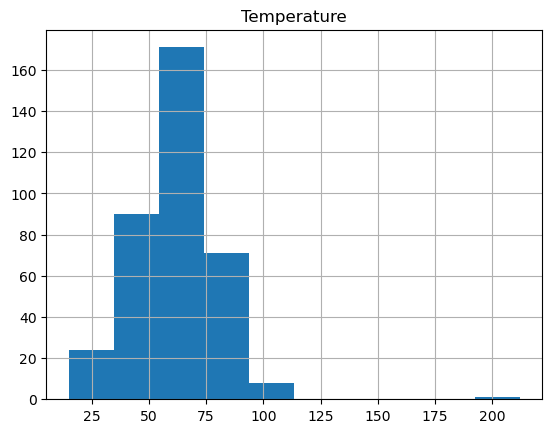

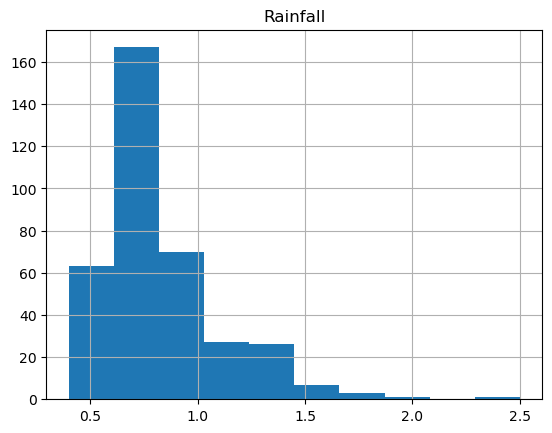

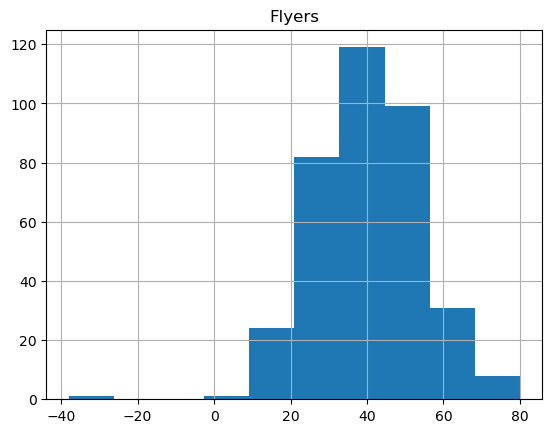

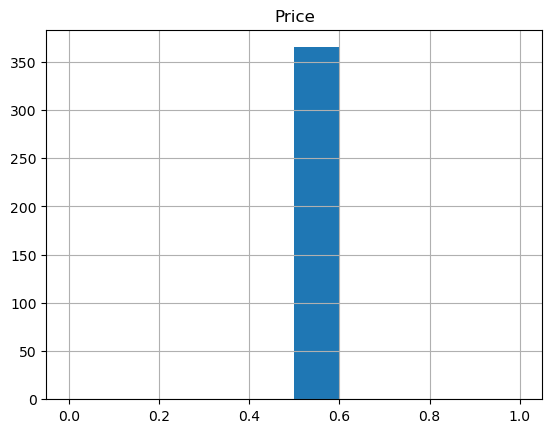

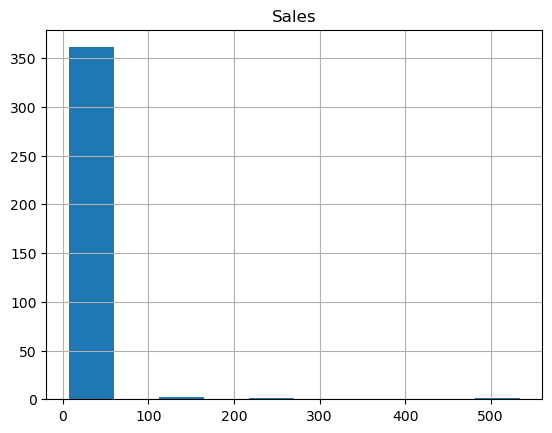

In [22]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].hist()
        plt.title(col)
        plt.show()

a. Use a 2 sigma decision rule to isolate the outliers.

       Do these make sense?
       Should certain outliers be kept or removed

In [49]:
for col in df.columns[2:5]:
    print(col)
    print('_______________')
    lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=2)
    high_out = df[df[col] > upper_bound]
    print(high_out)
    print('_______________')

Temperature
_______________
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
_______________
Rainfall
_______________
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
15    1/16/17     Monday         30.6      1.67      24    0.5     12
23    1/24/17    Tuesday         28.6      1.54      20    0.5     12
337   12/4/17     Monday         34.9      1.54      16    0.5     13
338   12/5/17    Tuesday         22.0      1.82      11    0.5     10
343  12/10/17     Sunday         31.3      1.82      15    0.5     11
347  12/14/17   Thursday         31.9      1.54      24    0.5     13
355  12/22/17     Friday   

b. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [50]:
for col in df.columns[2:5]:
    print(col)
    print('_______________')
    lower_bound, upper_bound = get_lower_upper_bounds(df[col], mult=3)
    high_out = df[df[col] > upper_bound]
    print(high_out)
    print('_______________')

Temperature
_______________
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
_______________
Rainfall
_______________
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
_______________
Flyers
_______________
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
_______________


* Would not keep the outlier for temperature - it is most likely incorrect input.
* Would not keep the lower flyers outlier - impossible to hand out negative flyers. (maybe they were lost?)
* Don't know enough about rainfall to determine which outliers would be important or not. 